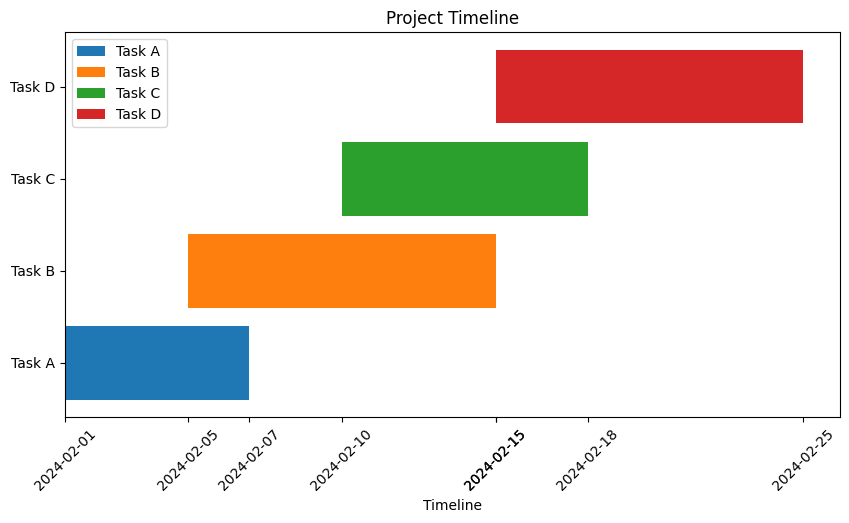

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
# Sample data
tasks = ["Task A", "Task B", "Task C", "Task D"]
start_dates = ["2024-02-01", "2024-02-05", "2024-02-10", "2024-02-15"]
end_dates = ["2024-02-07", "2024-02-15", "2024-02-18", "2024-02-25"]
# Convert date strings to datetime objects
start_dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in start_dates]
end_dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in end_dates]
# Create a figure and plot the timeline
fig, ax = plt.subplots(figsize=(10, 5))  # width and height
for i, task in enumerate(tasks):
    ax.barh(task, width=(end_dates[i] - start_dates[i]).days, left=start_dates[i], label=task)
# Customize the x-axis to display both start and end dates
ax.set_xticks(start_dates + end_dates)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Customize the plot
ax.set_xlabel("Timeline")
ax.set_title("Project Timeline")
ax.legend()
# Display the plot
plt.show()



In [7]:
#Setup Simulation Environment

In [11]:

import simpy
import pandas as pd
# Read data from CSV file
data = pd.read_csv('simulation.csv')
# Define a class for a mining section
class MiningSection:
    def __init__(self, env, name, length, width, depth):
        # Initialize attributes for the mining section
        self.env = env
        self.name = name
        self.length = length
        self.width = width
        self.depth = depth
        # Create a storage for equipment queue within the section
        self.equipment_queue = simpy.Store(env)
    # change Method to simulate moving equipment within the section
    def move_equipment(self, equipment):
        yield self.env.timeout(3)  # Time to move equipment within the section
# Function to simulate the equipment processing
def equipment_process(env, equipment, section, order):
    enter_time = env.now + order * 1  # Adjust entry time based on order with a 15-minute gap
    yield env.timeout(1)  # Introduce a 15-minute gap
    yield env.process(section.move_equipment(equipment))
    exit_time = enter_time + 3  # Adjust exit time based on equipment processing time (3 hours in this case)
    print(f"Equipment {equipment['Equipment']} entered {section.name} section at {get_formatted_time(enter_time)} and exited at {get_formatted_time(exit_time)}")
# Function to format simulation time into a readable format
def get_formatted_time(simulation_time):
    formatted_time = simulation_time % 24
    am_pm = 'AM' if 0 <= formatted_time < 12 else 'PM'
    formatted_hour = formatted_time % 12 if formatted_time % 12 != 0 else 12
    return f"{int(formatted_hour)}{am_pm}"
# Function to set up the simulation environment
def setup_simulation(env, data):
    # Remove rows with missing 'Section' data
    valid_data = data.dropna(subset=['Section'])
    # Iterate over rows and create mining sections and equipment processes
    for i, (_, equipment) in enumerate(valid_data.iterrows()):
        section = MiningSection(env, equipment['Section'], equipment['Length'], equipment['Width'], equipment['Depth'])
        env.process(equipment_process(env, equipment, section, i))
# Create a SimPy environment
env = simpy.Environment()
# Set up and run the simulation for 24 hours
setup_simulation(env, data)
env.run()



Equipment Drill1 entered East section at 12AM and exited at 3AM
Equipment Drill2 entered East section at 1AM and exited at 4AM
Equipment Truck1 entered East section at 2AM and exited at 5AM
Equipment Truck1 entered East section at 3AM and exited at 6AM
Equipment Truck2 entered East section at 4AM and exited at 7AM
Equipment Loader1 entered West section at 5AM and exited at 8AM
Equipment Loader1 entered West section at 6AM and exited at 9AM
Equipment Loader1 entered West section at 7AM and exited at 10AM
Equipment Loader1 entered West section at 8AM and exited at 11AM


# Map data schema relationships

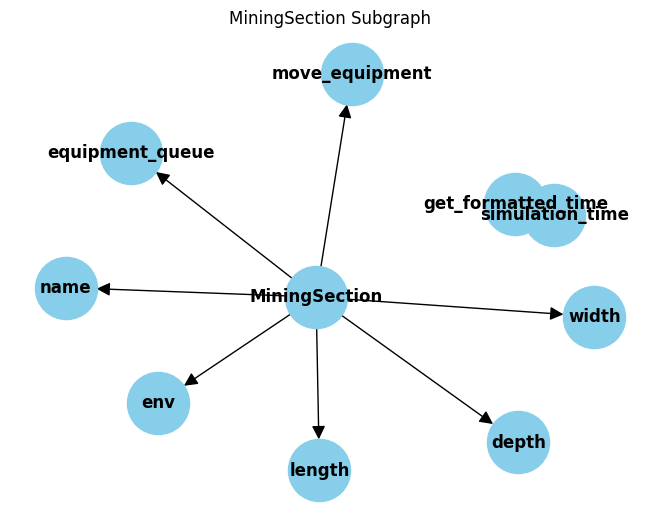

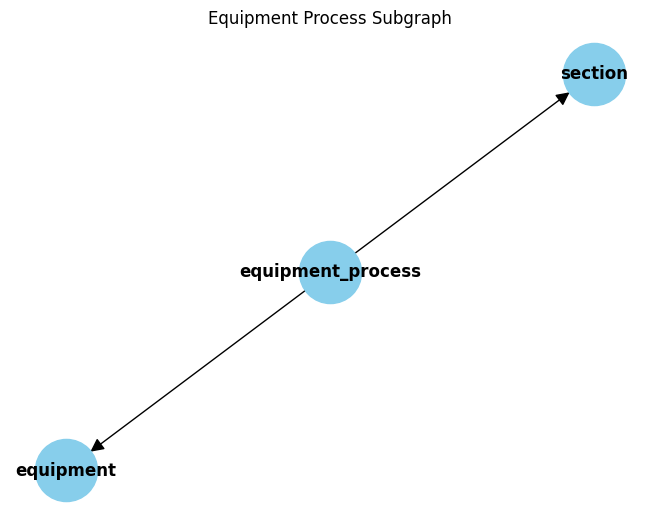

In [5]:
# Map data schema relationships
#
import networkx as nx #for graph representation
import matplotlib.pyplot as plt
# Create a directed graph
G = nx.DiGraph()
# Add nodes for classes and attributes
nodes = ['MiningSection', 'env', 'name', 'length', 'width', 'depth', 'equipment_queue',
         'move_equipment', 'equipment_process', 'get_formatted_time', 'simulation_time']
G.add_nodes_from(nodes)
# Add edges to represent relationships
edges = [('MiningSection', 'env'), ('MiningSection', 'name'), ('MiningSection', 'length'),
         ('MiningSection', 'width'), ('MiningSection', 'depth'), ('MiningSection', 'equipment_queue'),
         ('MiningSection', 'move_equipment'), ('move_equipment', 'equipment'), ('env', 'timeout'),
         ('equipment_process', 'section'), ('equipment_process', 'equipment'),
         ('get_formatted_time', 'simulation_time')]
G.add_edges_from(edges)
# Create a subgraph for 'MiningSection'
mining_section_nodes = ['MiningSection', 'env', 'name', 'length', 'width', 'depth', 'equipment_queue',
                        'move_equipment', 'get_formatted_time', 'simulation_time'] #simulation time and get fromatted time is optional
mining_section_subgraph = G.subgraph(mining_section_nodes)
# Get all nodes from 'equipment_process' class and its direct relationships
equipment_process_nodes = ['equipment_process', 'section', 'equipment']
equipment_process_subgraph = G.subgraph(equipment_process_nodes + [('equipment_process', 'section'), ('equipment_process', 'equipment')])
# Visualize the 'MiningSection' subgraph
pos_mining_section = nx.spring_layout(mining_section_subgraph)
nx.draw(mining_section_subgraph, pos_mining_section, with_labels=True, font_weight='bold', node_color='skyblue', node_size=2000, arrowsize=20)
plt.title('MiningSection Subgraph')
plt.show()
# Visualize the 'equipment_process' subgraph
pos_equipment_process = nx.spring_layout(equipment_process_subgraph)
nx.draw(equipment_process_subgraph, pos_equipment_process, with_labels=True, font_weight='bold', node_color='skyblue', node_size=2000, arrowsize=20)
plt.title('Equipment Process Subgraph')
plt.show()

In [2]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\CW\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [ ]:
#Build Geological Model

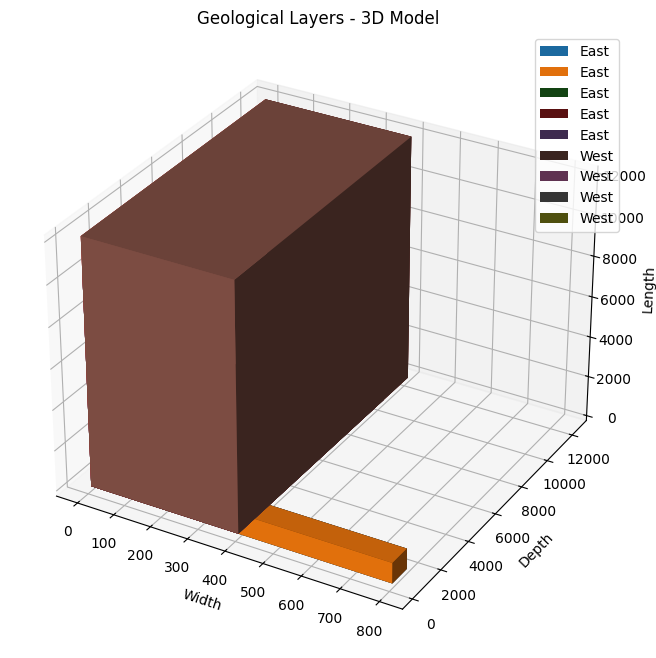

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re
# Read data from the provided CSV file
data = pd.read_csv('geological.csv')
# Remove non-numeric characters and convert to numeric
data['Length'] = pd.to_numeric(data['Length'].replace(r'[^\d.]', '', regex=True))
data['Depth'] = pd.to_numeric(data['Depth'].replace(r'[^\d.]', '', regex=True))
data['Width'] = pd.to_numeric(data['Width'].replace(r'[^\d.]', '', regex=True))
def visualize_geological_layers_3d(data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Sort the data by the 'Depth' column
    data_sorted = data.sort_values(by='Depth')
    for _, section in data_sorted.iterrows():
        depth_start = section['Depth']
        depth_end = depth_start + section['Length']
        width = section['Width']
        # Adjust the X-axis position for east and west
        if 'east' in section['Section']:
            x_pos = 1  # Adjust as needed
        elif 'west' in section['Section']:
            x_pos = -1  # Adjust as needed
        else:
            x_pos = 0
        ax.bar3d(x_pos, depth_start, 0, width, section['Length'], depth_end - depth_start, shade=True, label=section['Section'])
    ax.set_xlabel('Width')
    ax.set_ylabel('Depth')
    ax.set_zlabel('Length')
    ax.set_title('Geological Layers - 3D Model')
    ax.legend()
    plt.show()
# Visualize geological layers in 3D based on the modified data
visualize_geological_layers_3d(data)





In [ ]:
#Construct equipment objects

In [13]:
#Construct equipment objects

import pandas as pd
class Equipment:
    def __init__(self, name, type_of_equipment, capacity, power, section, type_of_section, depth, length, width, equipment, utilization, mtbf, mttr):
        self.name = name
        self.type_of_equipment = type_of_equipment
        self.capacity = capacity
        self.power = power
        self.section = section
        self.type_of_section = type_of_section
        self.depth = depth
        self.length = length
        self.width = width
        self.equipment = equipment
        self.utilization = utilization
        self.mtbf = mtbf
        self.mttr = mttr
def construct_objects(data):
    equipment_objects = []
    expected_attributes = ["name", "Type of Equipment", "Capacity", "Power", "Section", "Type of section", "Depth", "Length", "Width", "Equipment", "Utilization", "MTBF", "MTTR"]
    for _, item in data.iterrows():
        item_dict = {attr.replace(" ", "_").lower(): item.get(attr, None) for attr in expected_attributes}
        equipment_objects.append(Equipment(**item_dict))
    return equipment_objects
def create_timeline(equipment_objects):
    timeline = {}
    for equipment in equipment_objects:
        if pd.notna(equipment.section):
            section_key = f"{equipment.section.lower()} {equipment.type_of_section.lower()}"
            if section_key not in timeline:
                timeline[section_key] = []
            timeline[section_key].append({
                "name": equipment.name,
                "type_of_equipment": equipment.type_of_equipment,
                "capacity": equipment.capacity,
                "power": equipment.power,
                "depth": equipment.depth,
                "length": equipment.length,
                "width": equipment.width,
                "equipment": equipment.equipment,
                "utilization": equipment.utilization,
                "mtbf": equipment.mtbf,
                "mttr": equipment.mttr
            })
    return timeline
file_path = 'simulation1.csv'
data = pd.read_csv(file_path)
data['name'] = data['Equipment']
equipment_objects = construct_objects(data)
timeline = create_timeline(equipment_objects)
for section, equipment_list in timeline.items():
    print(f"{section}:\n")
    for equipment in equipment_list:
        print(f"- {equipment['name']}: Type {equipment['type_of_equipment']}, Capacity {equipment['capacity']}, Power {equipment['power']}, Utilization {equipment['utilization']}, MTBF {equipment['mtbf']}, MTTR {equipment['mttr']}")
    print("\n")


east surface:

- Drill1: Type Rotary, Capacity 2000m, Power 4500kW, Utilization 0.6, MTBF 300hrs, MTTR 2 days
- Drill2: Type Hammer, Capacity 1500m, Power 3500kW, Utilization 0.75, MTBF 200hrs, MTTR 1 day
- Truck1: Type Diesel, Capacity 100t, Power 5850HP, Utilization 0.6, MTBF 300hrs, MTTR 2 days
- Truck1: Type Diesel, Capacity 100t, Power 5850HP, Utilization 0.6, MTBF 300hrs, MTTR 2 days
- Truck2: Type Diesel, Capacity 100t, Power 5850HP, Utilization 0.6, MTBF 300hrs, MTTR 2 days


west underground:

- Loader1: Type Electrical, Capacity 12yd3, Power 2000kW, Utilization 0.6, MTBF 300hrs, MTTR 2 days
- Loader1: Type Electrical, Capacity 12yd3, Power 2000kW, Utilization 0.75, MTBF 200hrs, MTTR 1 day
- Loader1: Type Electrical, Capacity 12yd3, Power 2000kW, Utilization 0.9, MTBF 200hrs, MTTR 2 days
- Loader1: Type Electrical, Capacity 12yd3, Power 2000kW, Utilization 1.05, MTBF 200hrs, MTTR 2 days




In [ ]:
#Base Data Model Creation

In [ ]:
#Mine Plan

In [2]:
class Equipment:
    def __init__(self, equipment, mine, material, prod_date, work_hours, fuel_consumed, availability):
        self.equipment = equipment
        self.mine = mine
        self.material = material
        self.prod_date = prod_date
        self.work_hours = work_hours
        self.fuel_consumed = fuel_consumed
        self.availability = availability
class MinePlan:
    def __init__(self):
        self.equipment_list = []
    def add_equipment(self, equipment):
        self.equipment_list.append(equipment)
    def generate_mine_plan(self):
        for equipment in self.equipment_list:
            print(f"Mine Plan for {equipment.equipment} in {equipment.mine}:")
            print(f"- Use {equipment.equipment} to mine {equipment.material}.")
            print(f"- Operating hours: {equipment.work_hours}, Fuel consumed: {equipment.fuel_consumed}.")
            print(f"- Availability: {equipment.availability}\n")
# Example usage:
mine_plan = MinePlan()
# Adding equipment instances based on the provided data
mine_plan.add_equipment(Equipment("CAT996 Loader", "HZL", "Zinc Conc.", "10-Feb-23", "8 hours", "210 gal diesel", "92%"))
mine_plan.add_equipment(Equipment("Komatsu Dump Truck", "Geoth Mines", "Iron Ore", "13-Feb-23", "7 hours", "160 gal diesel", "100%"))
mine_plan.add_equipment(Equipment("backhoe", "Utkal Zinc", "Zinc Ore", "", "", "", ""))
mine_plan.add_equipment(Equipment("scraper", "Geoth Minerals", "Iron Ore", "", "", "", ""))
mine_plan.add_equipment(Equipment("CAT 785C Truck1", "", "", "", "", "", ""))
mine_plan.add_equipment(Equipment("Komatsu 860E Truck2", "", "", "", "", "", ""))
mine_plan.add_equipment(Equipment("Loader L-101", "", "Iron Ore", "01-Mar-23", "10", "150 min", ""))
mine_plan.add_equipment(Equipment("Loader L-102", "", "Iron Ore", "02-Mar-23", "10", "180 min", ""))
mine_plan.add_equipment(Equipment("Excavator 300 RDExcavator01", "", "Clay", "05-Mar-23", "107", "12500kg", ""))
mine_plan.add_equipment(Equipment("CAT 785C Truck1", "", "", "", "", "", ""))
mine_plan.add_equipment(Equipment("Komatsu 860E Truck2", "", "", "", "", "", ""))
mine_plan.add_equipment(Equipment("PC200 CAT Excavator", "", "Iron Ore", "12-Feb-23", "", "", ""))
mine_plan.add_equipment(Equipment("40T CAT Dump Truck", "", "Iron Ore", "15-Feb-23", "", "", ""))
mine_plan.add_equipment(Equipment("Shovel 1", "Vasanth Coal Mine", "Overburden", "01-01-2023", "8", "5000", ""))
mine_plan.add_equipment(Equipment("Truck 1", "Vasanth Coal Mine", "Coal", "01-01-2023", "8", "800", ""))
mine_plan.add_equipment(Equipment("Shovel 1", "Reddy Coal Mine", "Overburden", "01-02-2023", "8", "5000", ""))
mine_plan.add_equipment(Equipment("Truck 2", "Reddy Coal Mine", "Coal", "01-02-2023", "8", "800", ""))
mine_plan.add_equipment(Equipment("Dragline 1", "RP Minerals", "Overburden", "01-05-2023", "10", "7000", ""))
mine_plan.add_equipment(Equipment("Truck 1", "RP Minerals", "Coal", "01-05-2023", "10", "900", ""))
# Generating and displaying the mine plan
mine_plan.generate_mine_plan()


Mine Plan for CAT996 Loader in HZL:
- Use CAT996 Loader to mine Zinc Conc..
- Operating hours: 8 hours, Fuel consumed: 210 gal diesel.
- Availability: 92%

Mine Plan for Komatsu Dump Truck in Geoth Mines:
- Use Komatsu Dump Truck to mine Iron Ore.
- Operating hours: 7 hours, Fuel consumed: 160 gal diesel.
- Availability: 100%

Mine Plan for backhoe in Utkal Zinc:
- Use backhoe to mine Zinc Ore.
- Operating hours: , Fuel consumed: .
- Availability: 

Mine Plan for scraper in Geoth Minerals:
- Use scraper to mine Iron Ore.
- Operating hours: , Fuel consumed: .
- Availability: 

Mine Plan for CAT 785C Truck1 in :
- Use CAT 785C Truck1 to mine .
- Operating hours: , Fuel consumed: .
- Availability: 

Mine Plan for Komatsu 860E Truck2 in :
- Use Komatsu 860E Truck2 to mine .
- Operating hours: , Fuel consumed: .
- Availability: 

Mine Plan for Loader L-101 in :
- Use Loader L-101 to mine Iron Ore.
- Operating hours: 10, Fuel consumed: 150 min.
- Availability: 

Mine Plan for Loader L-102 in

In [ ]:
#Equipment Improvement performance

In [3]:
import pandas as pd
# Create a DataFrame with the provided equipment data
data = {
    'Equipment': ['Drill1', 'Drill2', 'Truck1', 'Truck1', 'Truck2', 'Loader1', 'Loader1', 'Loader1', 'Loader1'],
    'Type of equipment': ['Rotary', 'Hammer', 'Diesel', 'Diesel', 'Diesel', 'Electrical', 'Electrical', 'Electrical', 'Electrical'],
    'Capacity': ['2000m', '1500m', '100t', '100t', '100t', '12yd3', '12yd3', '12yd3', '12yd3'],
    'Power': ['4500kW', '3500kW', '5850HP', '5850HP', '5850HP', '2000kW', '2000kW', '2000kW', '2000kW'],
    'Section': ['East', 'East', 'East', 'East', 'East', 'West', 'West', 'West', 'West'],
    'Type of section': ['Surface', 'Surface', 'Surface', 'Surface', 'Surface', 'Underground', 'Underground', 'Underground', 'Underground'],
    'Depth': [200, 200, 200, 200, 200, 200, 200, 200, 800],
    'Length': [1000, 1000, 10250, 12080, 10250, 12081, 10250, 10250, 500],
    'Width': [800, 800, 400, 400, 400, 400, 400, 400, 10],
    'Utilization': [0.6, 0.75, 0.6, 0.6, 0.6, 0.6, 0.75, 0.9, 1.05],
    'MTBF': [300, 200, 300, 300, 300, 300, 200, 200, 200],
    'MTTR': ['2 days', '1 day', '2 days', '2 days', '2 days', '2 days', '1 day', '2 days', '2 days']
}
equipment_df = pd.DataFrame(data)
# 1. Introduction
"""
Provide an overview of the current state of equipment performance and the importance of improvement.
Briefly introduce the equipment in question.
"""
# 2. Current Equipment Performance
"""
Detail the existing performance metrics, including utilization, MTBF, MTTR, and any other relevant parameters.
Present any identified issues or challenges affecting performance.
"""
print("Current Equipment Performance:")
print(equipment_df)
# 3. Identified Improvement Areas
"""
Highlight specific areas where performance improvement is needed.
This could include high MTTR, low utilization, or other key performance indicators.
"""
identified_issues = equipment_df[(equipment_df['Utilization'] < 0.7) | (equipment_df['MTTR'] == '2 days')]
print("\nIdentified Improvement Areas:")
print(identified_issues)
# 4. Proposed Improvement Scenarios
"""
Outline different improvement scenarios, considering factors such as:
a. Utilization Enhancement: Strategies to increase equipment utilization, such as optimizing scheduling or workflow.
b. MTBF Improvement: Introduce measures to enhance Mean Time Between Failures, like preventive maintenance programs or technological upgrades.
c. MTTR Reduction: Propose methods to decrease Mean Time To Repair, including training programs or enhanced maintenance procedures.
"""
# Example: Placeholder for improvement scenarios
utilization_enhancement_scenario = {
    "Optimize Scheduling": identified_issues['Equipment'].tolist(),
}
mtbf_improvement_scenario = {
    "Preventive Maintenance Program": identified_issues['Equipment'].tolist(),
}
mttr_reduction_scenario = {
    "Enhanced Maintenance Procedures": identified_issues['Equipment'].tolist(),
}
# Display improvement scenarios
print("\nProposed Improvement Scenarios:")
print(f"a. Utilization Enhancement: {utilization_enhancement_scenario}")
print(f"b. MTBF Improvement: {mtbf_improvement_scenario}")
print(f"c. MTTR Reduction: {mttr_reduction_scenario}")



Current Equipment Performance:
  Equipment Type of equipment Capacity   Power Section Type of section  Depth  \
0    Drill1            Rotary    2000m  4500kW    East         Surface    200   
1    Drill2            Hammer    1500m  3500kW    East         Surface    200   
2    Truck1            Diesel     100t  5850HP    East         Surface    200   
3    Truck1            Diesel     100t  5850HP    East         Surface    200   
4    Truck2            Diesel     100t  5850HP    East         Surface    200   
5   Loader1        Electrical    12yd3  2000kW    West     Underground    200   
6   Loader1        Electrical    12yd3  2000kW    West     Underground    200   
7   Loader1        Electrical    12yd3  2000kW    West     Underground    200   
8   Loader1        Electrical    12yd3  2000kW    West     Underground    800   

   Length  Width  Utilization  MTBF    MTTR  
0    1000    800         0.60   300  2 days  
1    1000    800         0.75   200   1 day  
2   10250    400    

In [ ]:
#Graphs

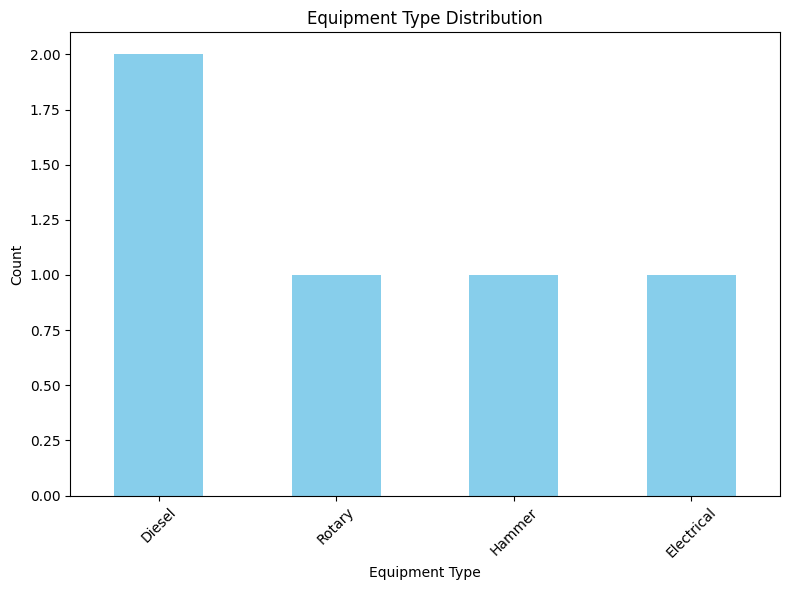

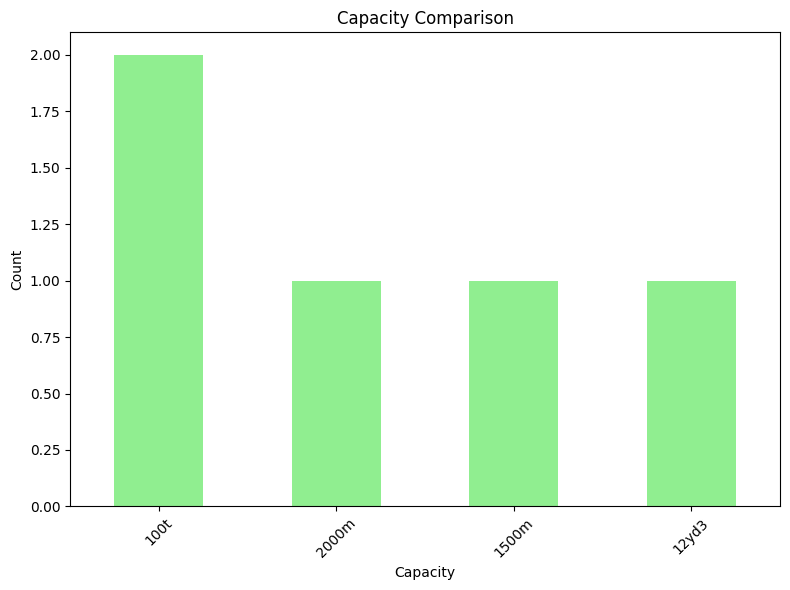

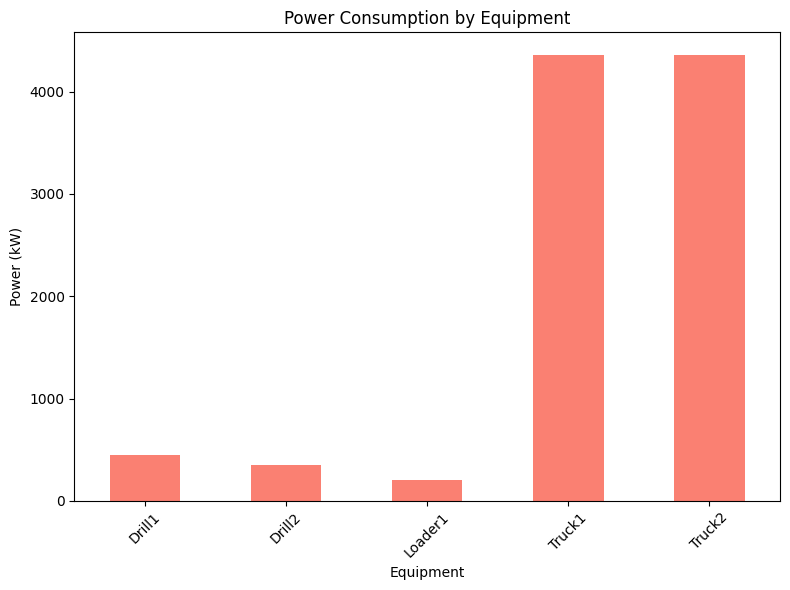

In [4]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting
import pandas as pd  # Importing the pandas library for data manipulation

# Create a DataFrame with the given data
data = {
    'Equipment': ['Drill1', 'Drill2', 'Truck1', 'Truck2', 'Loader1'],
    'Type': ['Rotary', 'Hammer', 'Diesel', 'Diesel', 'Electrical'],
    'Capacity': ['2000m', '1500m', '100t', '100t', '12yd3'],
    'Power': ['4500kW', '3500kW', '5850HP', '5850HP', '2000kW']
}

df = pd.DataFrame(data)  # Creating a DataFrame from the provided data

# Equipment Type Distribution
plt.figure(figsize=(8, 6))  # Creating a new figure with a specific size
df['Type'].value_counts().plot(kind='bar', color='skyblue')  # Creating a bar plot of equipment types
plt.title('Equipment Type Distribution')  # Setting the title of the plot
plt.xlabel('Equipment Type')  # Setting the label for the x-axis
plt.ylabel('Count')  # Setting the label for the y-axis
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.tight_layout()  # Adjusting the layout to prevent clipping of labels
plt.show()  # Displaying the plot

# Capacity Comparison
plt.figure(figsize=(8, 6))  # Creating a new figure with a specific size
df['Capacity'].value_counts().plot(kind='bar', color='lightgreen')  # Creating a bar plot of equipment capacities
plt.title('Capacity Comparison')  # Setting the title of the plot
plt.xlabel('Capacity')  # Setting the label for the x-axis
plt.ylabel('Count')  # Setting the label for the y-axis
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.tight_layout()  # Adjusting the layout to prevent clipping of labels
plt.show()  # Displaying the plot

# Power Consumption
plt.figure(figsize=(8, 6))  # Creating a new figure with a specific size
# Convert HP to kW for consistency
df['Power'] = df['Power'].apply(lambda x: int(x[:-2]) * 0.7457 if 'HP' in x else int(x[:-3]))
# Grouping by equipment and summing the power consumption
df.groupby('Equipment')['Power'].sum().plot(kind='bar', color='salmon')
plt.title('Power Consumption by Equipment')  # Setting the title of the plot
plt.xlabel('Equipment')  # Setting the label for the x-axis
plt.ylabel('Power (kW)')  # Setting the label for the y-axis
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.tight_layout()  # Adjusting the layout to prevent clipping of labels
plt.show()  # Displaying the plot


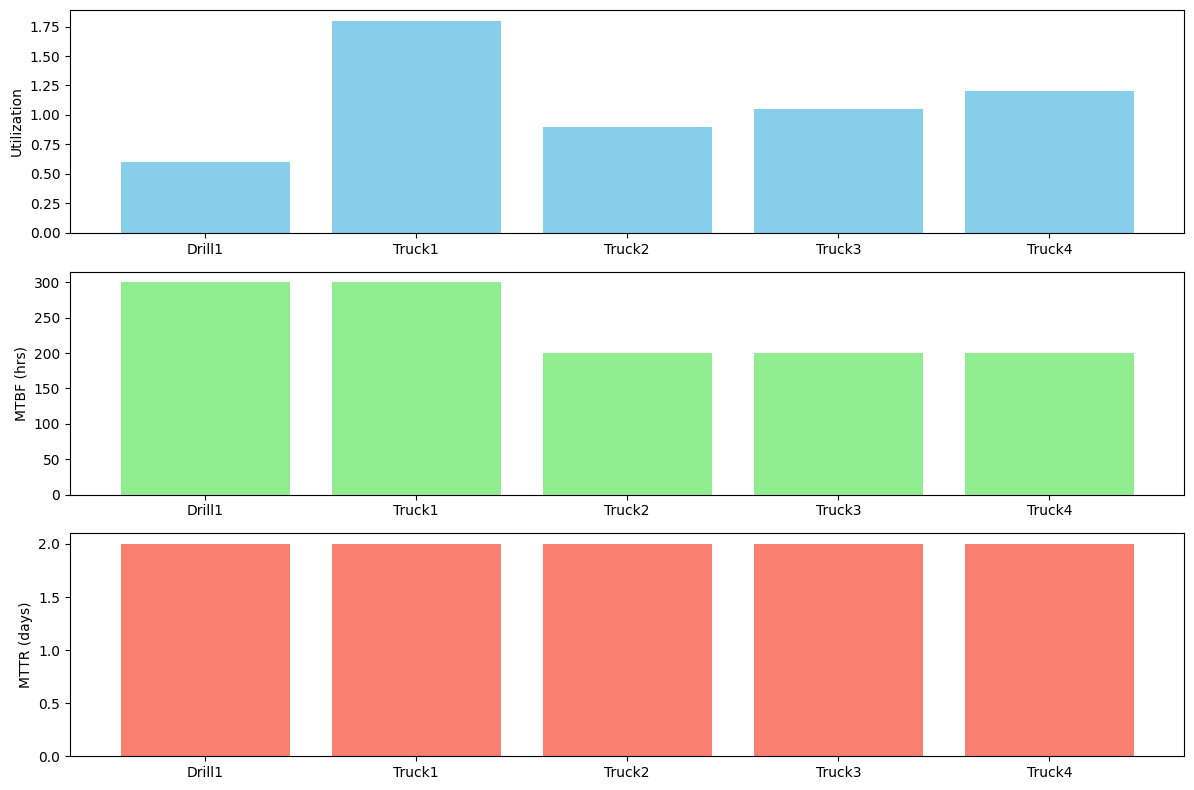

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the given data
data = {
    'Equipment': ['Drill1', 'Truck1', 'Drill1', 'Drill1', 'Drill1', 'Drill1', 'Truck1', 'Truck2', 'Truck3', 'Truck4', 'Truck1', 'Truck1', 'Truck1', 'Truck1'],
    'Utilization': [0.6, 0.75, 0.6, 0.6, 0.6, 0.6, 0.75, 0.9, 1.05, 1.2, 1.35, 1.5, 1.65, 1.8],
    'MTBF': ['300hrs', '200hrs', '300hrs', '300hrs', '300hrs', '300hrs', '200hrs', '200hrs', '200hrs', '200hrs', '200hrs', '300hrs', '300hrs', '300hrs'],
    'MTTR': ['2 days', '1 day', '2 days', '2 days', '2 days', '2 days', '1 day', '2 days', '2 days', '2 days', '2 days', '1 day', '1 day', '1 day']
}

df = pd.DataFrame(data)  # Creating a DataFrame from the provided data

# Convert 'MTBF' to numeric by removing 'hrs' and convert 'MTTR' to numeric by removing 'days'
df['MTBF'] = pd.to_numeric(df['MTBF'].str.replace('hrs', ''), errors='coerce')
df['MTTR'] = pd.to_numeric(df['MTTR'].str.replace('days', ''), errors='coerce')

# Plotting Utilization, MTBF, and MTTR for each equipment
plt.figure(figsize=(12, 8))

# Plot Utilization
plt.subplot(3, 1, 1)
plt.bar(df['Equipment'], df['Utilization'], color='skyblue')
plt.ylabel('Utilization')

# Plot MTBF
plt.subplot(3, 1, 2)
plt.bar(df['Equipment'], df['MTBF'], color='lightgreen')
plt.ylabel('MTBF (hrs)')

# Plot MTTR
plt.subplot(3, 1, 3)
plt.bar(df['Equipment'], df['MTTR'], color='salmon')
plt.ylabel('MTTR (days)')

plt.tight_layout()
plt.show()